In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Mcdonalds_dataset.csv')
print(data.shape)
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

(1453, 15)


In [3]:
print(data.head())
data.columns

  yummy convenient spicy fattening  ... Like Age      VisitFrequency  Gender
0    No        Yes    No       Yes  ...   -3  61  Every three months  Female
1   Yes        Yes    No       Yes  ...   +2  51  Every three months  Female
2    No        Yes   Yes       Yes  ...   +1  62  Every three months  Female
3   Yes        Yes    No       Yes  ...   +4  69         Once a week  Female
4    No        Yes    No       Yes  ...   +2  49        Once a month    Male

[5 rows x 15 columns]


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

#Exploring the Data


In [4]:
import numpy as np
segment_variables=data.iloc[:,:11]
segment_variables.replace(('Yes', 'No'), (1, 0), inplace=True)
col11=segment_variables
segment_variables=np.array(segment_variables)

print(segment_variables)
column_means=np.mean(segment_variables,axis=0)
column_means

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


array([0.55264969, 0.90777701, 0.09359945, 0.86717137, 0.5264969 ,
       0.90020647, 0.59876118, 0.64418445, 0.35788025, 0.19889883,
       0.24294563])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
x = pca.fit_transform(X=segment_variables)
names=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
df = pd.DataFrame(data=x,columns=names)
df


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [6]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [7]:
pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [8]:
loadings = pca.components_
loadings_df = pd.DataFrame.from_dict(dict(zip(names, loadings)))
loadings_df['variable'] = data.iloc[:,:11].columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


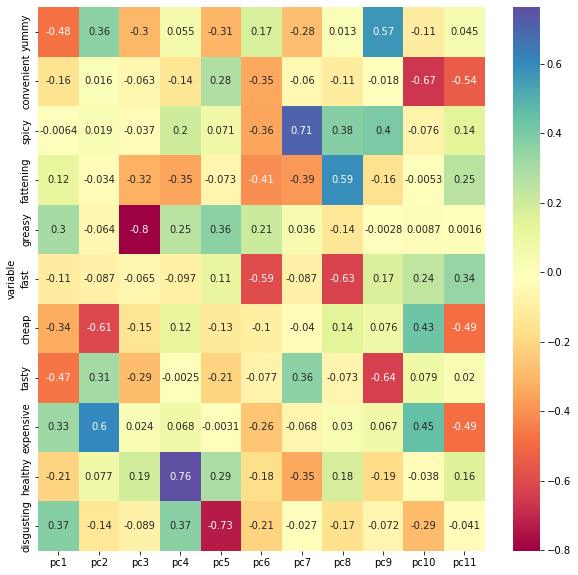

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

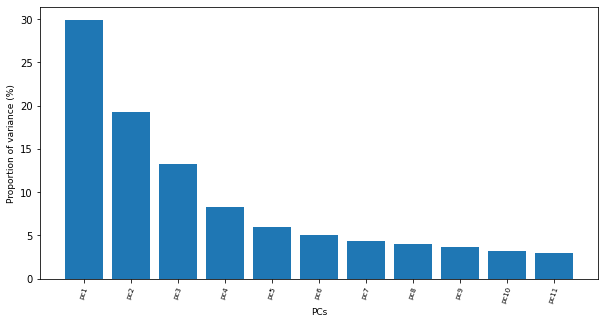

In [12]:
#scree Plot
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[names, pca.explained_variance_ratio_],show=True,dim=(10,5))

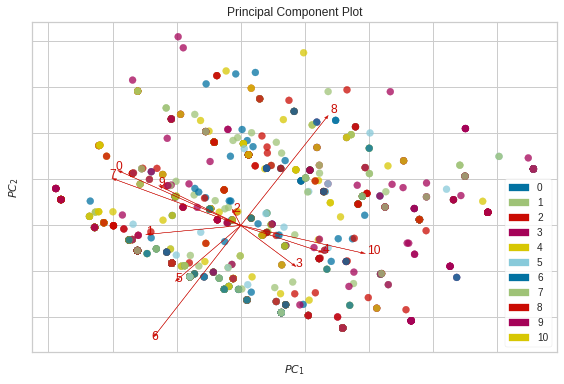

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [13]:
from yellowbrick.features.pca import PCADecomposition
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X = pd.DataFrame(segment_variables)
y=data.iloc[:,11]
y= label_encoder.fit_transform(y)
visualizer = PCADecomposition(scale=True, proj_features = True, color = None,)
visualizer.fit_transform(X,y)
visualizer.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

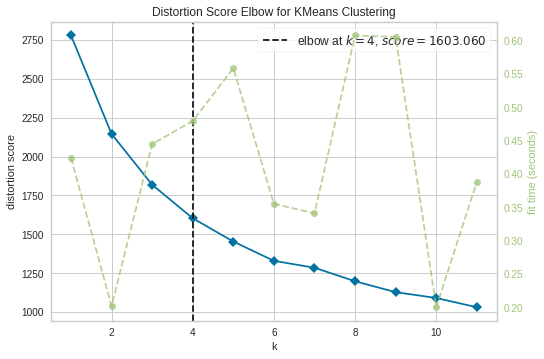

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(col11)
visualizer.show()

In [20]:
km = KMeans(n_clusters=4,random_state=0,init='k-means++').fit(col11)
data['cluster'] = km.labels_
df['cluster'] = km.labels_
print(km.cluster_centers_)
data

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,2
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,1
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male,3
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,1
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,0
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,1


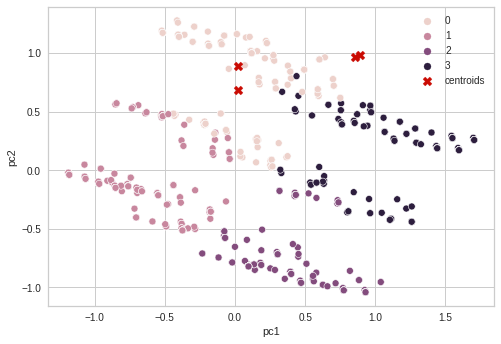

In [21]:
#visualising Clusters
sns.scatterplot(data=df, x="pc1", y="pc2", hue=km.labels_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [27]:
from statsmodels.graphics.mosaicplot import mosaic
crosstab = pd.crosstab(data['cluster'],data['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


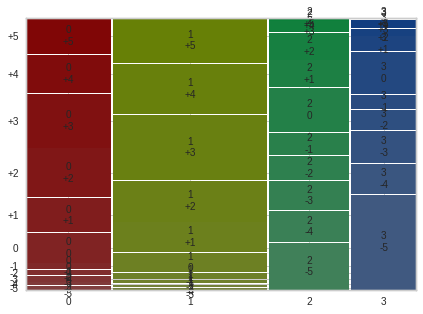

In [29]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [31]:
crossgender = pd.crosstab(data['cluster'],data['Gender'])
crossgender

Gender,Female,Male
cluster,,
0,154,169
1,349,231
2,179,125
3,106,140


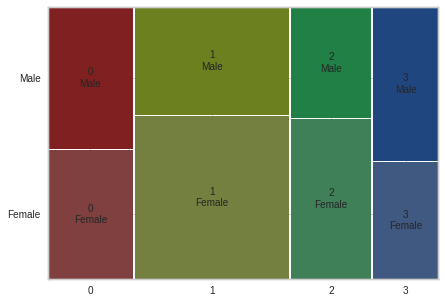

In [37]:
#Gender vs segment
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crossgender.stack())
plt.show()

<Axes: xlabel='cluster', ylabel='Age'>

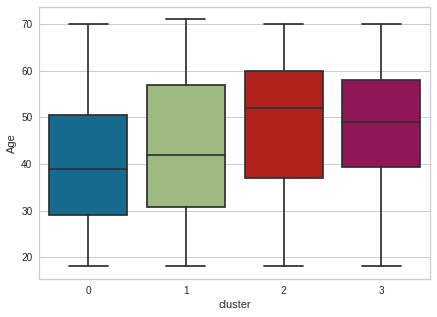

In [38]:
#Box plot for Age
sns.boxplot(x="cluster", y="Age", data=data)

Selecting Target segment

In [48]:
from sklearn.preprocessing import LabelEncoder
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visitfreq = data.groupby('cluster')['VisitFrequency'].mean()
visitfreq= visitfreq.to_frame().reset_index()
visitfreq

,cluster,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [50]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster')['Like'].mean()
Like = Like.reset_index()
Like


,cluster,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [52]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster')['Gender'].mean()
Gender = Gender.reset_index()
Gender


,cluster,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [54]:
segment = Gender.merge(Like, on='cluster', how='left').merge(visitfreq, on='cluster', how='left')
segment

,cluster,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


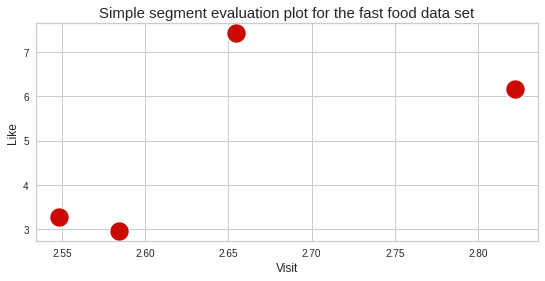

In [55]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install flexcluster


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=db3926d2d1ec2a5ce69b8913754f3a3c7a36abe0adf7b8c60ddd80d5003122c6
  Stored in directory: /root/.cache/pip/wheels/c9/ab/ed/8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
Successfully built bioinfokit
